In [ ]:
import random
import numpy
import torch
import os, sys
from DLStudio import *
import copy
from pycocotools.coco import COCO
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as tvt
import time
from torch.utils.data import Dataset, DataLoader
import cv2
import json



In [ ]:
# uncomment all the code below to extract and save the data first
# run it only once

In [ ]:
# #to extract the required images
# # Path to COCO dataset annotations
# train_annotation_path = 'COCO/2017/annotations/instances_train2017.json' #location of train annotation
# val_annotation_path = 'COCO/2017/annotations/instances_val2017.json' #location of val annotation
# train_image_path= 'COCO/2017/train2017' #location of train images
# val_image_path= 'COCO/2017/val2017' #location of val images


# # Categories of interest
# categories_of_interest = ['cake', 'dog', 'motorcycle'] #list of categories by name
# min_object_area = 40000
# target_image_size = (256, 256)


# def resize_and_scale_bbox(image, bbox, segmentation, target_size):
#     # Resize image
#     resized_image = cv2.resize(image, target_size)

#     # Calculate scaling factors for bounding box coordinates
#     scale_x = target_size[0] / image.shape[1]
#     scale_y = target_size[1] / image.shape[0]

#     # Resize bounding box coordinates
#     x, y, w, h = bbox
#     resized_bbox = [int(x * scale_x), int(y * scale_y), int(w * scale_x), int(h * scale_y)]

#     # Resize segmentation masks
#     resized_segmentation = []
#     for seg in segmentation:
#         # Convert segmentation polygon to numpy array
#         seg_np = numpy.array(seg).reshape(-1, 2)
#         # Scale segmentation points
#         resized_seg_np = (seg_np * [scale_x, scale_y]).astype(int)
#         # Reshape to original format
#         resized_seg = resized_seg_np.reshape(-1).tolist()
#         resized_segmentation.append(resized_seg)

#     return resized_image, resized_bbox, resized_segmentation



# # Load COCO dataset
# coco_train = COCO(train_annotation_path)
# coco_val = COCO(val_annotation_path)


# def get_category_id(category_name):
#     cat_ids = coco_train.getCatIds(catNms=[category_name])
#     if cat_ids:
#         return cat_ids[0]
#     else:
#         return None
# category_ids_of_interest= [get_category_id(category) for category in categories_of_interest]
# category_id_to_class_map= {key:value for (key, value) in zip(category_ids_of_interest, categories_of_interest) }
# category_id_to_classid_map= {key:value for (key, value) in zip(category_ids_of_interest, [0, 1, 2]) }


In [ ]:
# train_single_object_data = []
# train_repeat_check= []
# for img_id in coco_train.imgs:
#     ann_ids = coco_train.getAnnIds(imgIds=img_id)
#     anns = coco_train.loadAnns(ann_ids)

#     for ann in anns:
#         if ann['category_id'] in category_ids_of_interest and ann['area'] > min_object_area:
#             image_path = os.path.join(train_image_path, coco_train.imgs[img_id]['file_name'])
#             if image_path in train_repeat_check:
#               continue
#             train_repeat_check.append(image_path)
#             image = cv2.imread(image_path)
#             segmentation= ann['segmentation']
#             if(type(segmentation)!=list):
#               continue
#             if image.any()==None:
#               continue
#             resized_image, resized_bbox, resized_segmentation = resize_and_scale_bbox(image, ann['bbox'], segmentation, target_image_size)
#             train_single_object_data.append({
#                 'image_name': coco_train.imgs[img_id]['file_name'],
#                 'image_size': target_image_size,
#                 'resized_image': resized_image,  # Add resized image
#                 'bbox': resized_bbox,
#                 'category_id': ann['category_id'],
#                 'class_name': category_id_to_class_map[ann['category_id']],
#                 'class_id' : category_id_to_classid_map[ann['category_id']],
#                 'segmentation': resized_segmentation
#             })


# # Filter and process images for testing set (Single Object)
# test_single_object_data = []
# test_repeat_check=[]
# for img_id in coco_val.imgs:
#     ann_ids = coco_val.getAnnIds(imgIds=img_id)
#     anns = coco_val.loadAnns(ann_ids)
#     for ann in anns:
#         if ann['category_id'] in category_ids_of_interest and ann['area'] > min_object_area:

#             image_path = os.path.join(val_image_path, coco_val.imgs[img_id]['file_name'])
#             if image_path in test_repeat_check:
#               continue
#             test_repeat_check.append(image_path)
#             image = cv2.imread(image_path)
#             segmentation= ann['segmentation']
#             if(type(segmentation)!=list):
#               continue
#             if image.any()==None:
#               continue
#             resized_image, resized_bbox, resized_segmentation = resize_and_scale_bbox(image, ann['bbox'], segmentation, target_image_size)
#             test_single_object_data.append({
#                 'image_name': coco_val.imgs[img_id]['file_name'],
#                 'image_size': target_image_size,
#                 'resized_image': resized_image,  # Add resized image
#                 'bbox': resized_bbox,
#                 'category_id': ann['category_id'],
#                 'class_name': category_id_to_class_map[ann['category_id']],
#                 'class_id' : category_id_to_classid_map[ann['category_id']],
#                 'segmentation': resized_segmentation
#             })


# Save the processed images and annotations to disk for both training and testing sets (Single Object)
# train_single_object_output_dir = '/Extracted_CocoLOAD/train_single_object'
# test_single_object_output_dir = '/Extracted_CocoLOAD/validation_single_object'






In [ ]:
# Save the processed images and annotations to disk for both training and testing sets (Single Object)
# train_single_object_output_dir = 'SegmentationData/train_single_object'
# test_single_object_output_dir = 'SegmentationData/validation_single_object'

# # Create output directories if they don't exist
# os.makedirs(train_single_object_output_dir, exist_ok=True)
# os.makedirs(test_single_object_output_dir, exist_ok=True)

# # Save training images and annotations for single objects
# saved_image_train_single_object = []
# for i, data in enumerate(train_single_object_data):
#     if data in saved_image_train_single_object:
#         continue
#     saved_image_train_single_object.append(data)
#     image_name = f"train_single_object_{i}.jpg"
#     cv2.imwrite(os.path.join(train_single_object_output_dir, image_name), data['resized_image'])
#     with open(os.path.join(train_single_object_output_dir, f"train_single_object_{i}.json"), 'w') as f:
#         json.dump({
#             'image_name': image_name,
#             'image_size': target_image_size,
#             'bbox': data['bbox'],
#             'category_id': data['category_id'],
#             'class_name': data['class_name'],
#             'class_id': data['class_id'],
#             'segmentation': data['segmentation'],
#             'num_objects': 1,
#         }, f)

# # Save testing images and annotations for single objects
# saved_image_test_single_object = []  # To make sure that the same image is not repeated
# for i, data in enumerate(test_single_object_data):
#     if data in saved_image_test_single_object:
#         continue
#     saved_image_test_single_object.append(data)
#     image_name = f"test_single_object_{i}.jpg"
#     cv2.imwrite(os.path.join(test_single_object_output_dir, image_name), data['resized_image'])
#     with open(os.path.join(test_single_object_output_dir, f"test_single_object_{i}.json"), 'w') as f:
#         json.dump({
#             'image_name': image_name,
#             'image_size': target_image_size,
#             'bbox': data['bbox'],
#             'category_id': data['category_id'],
#             'class_name': data['class_name'],
#             'class_id': data['class_id'],
#             'segmentation': data['segmentation'],
#             'num_objects': 1,
#         },f)


In [ ]:
import os
import json
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class CocoSegmentationDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
        self.annotations = self.load_annotations()

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        image_path = os.path.join(self.data_dir, self.annotations[idx]['image_name'])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        segmentation = self.annotations[idx]['segmentation']  # Load segmentation
        mask = self.create_mask(image.shape[:2], segmentation)  # Create mask from segmentation
        bboxes = self.annotations[idx]['bbox']
        bboxes_tensor= torch.LongTensor(bboxes)
        image = self.transform(image)
        return image, mask, bboxes_tensor #return image, mask, and bounding box

    def load_annotations(self):
        annotations = []
        for file in os.listdir(self.data_dir):
            if file.endswith('.json'):
                with open(os.path.join(self.data_dir, file), 'r') as f:
                    annotations.append(json.load(f))
        return annotations

    def create_mask(self, image_size, segmentation):
        mask = np.zeros(image_size, dtype=np.float32)  # Initialize mask with zeros
        for polygon in segmentation:
            pts = np.array(polygon, np.int32).reshape((-1, 2))
            cv2.fillPoly(mask, [pts], 1)  # Fill polygon with white color (255)
        mask = torch.tensor(mask, dtype=torch.float32)  # Convert mask to tensor
        return mask.unsqueeze(0)  # Add batch dimension



In [ ]:
# Define paths to the extracted images and annotations
train_data_dir = 'SegmentationData/train_single_object'
test_data_dir = 'SegmentationData/validation_single_object'

# Create custom datasets
train_dataset = CocoSegmentationDataset(train_data_dir)
test_dataset = CocoSegmentationDataset(test_data_dir)


In [ ]:
# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
class SkipBlockDN(nn.Module):
    """
    This class for the skip connections in the downward leg of the "U"
    Extracted from: https://engineering.purdue.edu/kak/distDLS/DLStudio-2.3.3_CodeOnly.html
    Class Path:   DLStudio  ->  SemanticSegmentation  ->  SkipBlockDN
    """
    def __init__(self, in_ch, out_ch, downsample=False, skip_connections=True):
        super(SkipBlockDN, self).__init__()
        self.downsample = downsample
        self.skip_connections = skip_connections
        self.in_ch = in_ch
        self.out_ch = out_ch
        self.convo1 = nn.Conv2d(in_ch, out_ch, 3, stride=1, padding=1)
        self.convo2 = nn.Conv2d(in_ch, out_ch, 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(out_ch)
        self.bn2 = nn.BatchNorm2d(out_ch)
        if downsample:
            self.downsampler = nn.Conv2d(in_ch, out_ch, 1, stride=2)
    def forward(self, x):
        identity = x
        out = self.convo1(x)
        out = self.bn1(out)
        out = nn.functional.relu(out)
        if self.in_ch == self.out_ch:
            out = self.convo2(out)
            out = self.bn2(out)
            out = nn.functional.relu(out)
        if self.downsample:
            out = self.downsampler(out)
            identity = self.downsampler(identity)
        if self.skip_connections:
            if self.in_ch == self.out_ch:
                out = out + identity
            else:
                out = out + torch.cat((identity, identity), dim=1)
        return out


class SkipBlockUP(nn.Module):
    """
    This class is for the skip connections in the upward leg of the "U"
    Extracted from: https://engineering.purdue.edu/kak/distDLS/DLStudio-2.3.3_CodeOnly.html
    Class Path:   DLStudio  ->  SemanticSegmentation  ->  SkipBlockUP
    """
    def __init__(self, in_ch, out_ch, upsample=False, skip_connections=True):
        super(SkipBlockUP, self).__init__()
        self.upsample = upsample
        self.skip_connections = skip_connections
        self.in_ch = in_ch
        self.out_ch = out_ch
        self.convoT1 = nn.ConvTranspose2d(in_ch, out_ch, 3, padding=1)
        self.convoT2 = nn.ConvTranspose2d(in_ch, out_ch, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_ch)
        self.bn2 = nn.BatchNorm2d(out_ch)
        if upsample:
            self.upsampler = nn.ConvTranspose2d(in_ch, out_ch, 1, stride=2, dilation=2, output_padding=1, padding=0)
    def forward(self, x):
        identity = x
        out = self.convoT1(x)
        out = self.bn1(out)
        out = nn.functional.relu(out)
        out  =  nn.ReLU(inplace=False)(out)
        if self.in_ch == self.out_ch:
            out = self.convoT2(out)
            out = self.bn2(out)
            out = nn.functional.relu(out)
        if self.upsample:
            out = self.upsampler(out)
            identity = self.upsampler(identity)
        if self.skip_connections:
            if self.in_ch == self.out_ch:
                out = out + identity
            else:
                out = out + identity[:,self.out_ch:,:,:]
        return out


class mUnet(nn.Module):

        """ The original mUnet modified to give 1 channel only since we have one object per image
        Adapted from the original mUnet at: Extracted from: https://engineering.purdue.edu/kak/distDLS/DLStudio-2.3.3_CodeOnly.html
        """
        def __init__(self, skip_connections=True, depth=16):
            super(mUnet, self).__init__()
            self.depth = depth // 2
            self.conv_in = nn.Conv2d(3, 64, 3, padding=1)
            ##  For the DN arm of the U:
            self.bn1DN  = nn.BatchNorm2d(64)
            self.bn2DN  = nn.BatchNorm2d(128)
            self.skip64DN_arr = nn.ModuleList()
            for i in range(self.depth):
                self.skip64DN_arr.append(SkipBlockDN(64, 64, skip_connections=skip_connections))
            self.skip64dsDN = SkipBlockDN(64, 64,   downsample=True, skip_connections=skip_connections)
            self.skip64to128DN = SkipBlockDN(64, 128, skip_connections=skip_connections )
            self.skip128DN_arr = nn.ModuleList()
            for i in range(self.depth):
                self.skip128DN_arr.append(SkipBlockDN(128, 128, skip_connections=skip_connections))
            self.skip128dsDN = SkipBlockDN(128,128, downsample=True, skip_connections=skip_connections)
            ##  For the UP arm of the U:
            self.bn1UP  = nn.BatchNorm2d(128)
            self.bn2UP  = nn.BatchNorm2d(64)
            self.skip64UP_arr = nn.ModuleList()
            for i in range(self.depth):
                self.skip64UP_arr.append(SkipBlockUP(64, 64, skip_connections=skip_connections))
            self.skip64usUP = SkipBlockUP(64, 64, upsample=True, skip_connections=skip_connections)
            self.skip128to64UP = SkipBlockUP(128, 64, skip_connections=skip_connections )
            self.skip128UP_arr = nn.ModuleList()
            for i in range(self.depth):
                self.skip128UP_arr.append(SkipBlockUP(128, 128, skip_connections=skip_connections))
            self.skip128usUP = SkipBlockUP(128,128, upsample=True, skip_connections=skip_connections)
            self.conv_out = nn.ConvTranspose2d(64, 1, 3, stride=2,dilation=2,output_padding=1,padding=2) #changed output channels to 1

        def forward(self, x):
            ##  Going down to the bottom of the U:
            x = nn.MaxPool2d(2,2)(nn.functional.relu(self.conv_in(x)))
            for i,skip64 in enumerate(self.skip64DN_arr[:self.depth//4]):
                x = skip64(x)

            num_channels_to_save1 = x.shape[1] // 2
            save_for_upside_1 = x[:,:num_channels_to_save1,:,:].clone()
            x = self.skip64dsDN(x)
            for i,skip64 in enumerate(self.skip64DN_arr[self.depth//4:]):
                x = skip64(x)
            x = self.bn1DN(x)
            num_channels_to_save2 = x.shape[1] // 2
            save_for_upside_2 = x[:,:num_channels_to_save2,:,:].clone()
            x = self.skip64to128DN(x)
            for i,skip128 in enumerate(self.skip128DN_arr[:self.depth//4]):
                x = skip128(x)

            x = self.bn2DN(x)
            num_channels_to_save3 = x.shape[1] // 2
            save_for_upside_3 = x[:,:num_channels_to_save3,:,:].clone()
            for i,skip128 in enumerate(self.skip128DN_arr[self.depth//4:]):
                x = skip128(x)
            x = self.skip128dsDN(x)
            ## Coming up from the bottom of U on the other side:
            x = self.skip128usUP(x)
            for i,skip128 in enumerate(self.skip128UP_arr[:self.depth//4]):
                x = skip128(x)
            x[:,:num_channels_to_save3,:,:] =  save_for_upside_3
            x = self.bn1UP(x)
            for i,skip128 in enumerate(self.skip128UP_arr[:self.depth//4]):
                x = skip128(x)
            x = self.skip128to64UP(x)
            for i,skip64 in enumerate(self.skip64UP_arr[self.depth//4:]):
                x = skip64(x)
            x[:,:num_channels_to_save2,:,:] =  save_for_upside_2
            x = self.bn2UP(x)
            x = self.skip64usUP(x)
            for i,skip64 in enumerate(self.skip64UP_arr[:self.depth//4]):
                x = skip64(x)
            x[:,:num_channels_to_save1,:,:] =  save_for_upside_1
            x = F.sigmoid(self.conv_out(x))
            return x

In [ ]:
seed = 0
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
numpy.random.seed(seed)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmarks=False
os.environ['PYTHONHASHSEED'] = str(seed)



class CustomizedSemanticSegmentation():
    def __init__(self, train_dataloader, test_dataloader, epochs, device):
        """In addition to the original DLStudio.SemanticSegmentation, it takes a keyboard argument 'loss' which takes values
        of 'MSE', 'Dice', and 'Combined' to use different loss functions. Further the run_code_for_training_for_semantic_segmentation returns
        the loss values.

        Adapted from: https://engineering.purdue.edu/kak/distDLS/DLStudio-2.3.3_CodeOnly.html
        """

        self.train_dataloader= train_dataloader
        self.test_dataloader= test_dataloader
        self.epochs= epochs
        self.device= device

    def dice_loss(self, preds: torch.Tensor, ground_truth: torch.Tensor, epsilon=1e-6): #defining dice_loss
        """
        Compute the Dice loss between predicted masks and ground truth masks.

        Args:
        - preds (torch.Tensor): Predicted mask tensor.
        - ground_truth (torch.Tensor): Ground truth mask tensor.
        - epsilon (float): Small value to avoid division by zero.

        Returns:
        - dice_loss: Dice loss value.
        """
        numerator= torch.sum(preds*ground_truth)
        denominator= torch.sum(preds*preds) + torch.sum(ground_truth * ground_truth)
        dice_coefficient= 2*numerator/(denominator+epsilon)


        dice_loss= 1-dice_coefficient

        return dice_loss


    def run_code_for_training_for_semantic_segmentation(self, net, save_name, **kwargs):
            loss_fn= 'MSE' #default loss function
            if 'loss' in kwargs:  #checking if any loss function is provided
                loss_fn= kwargs.pop('loss')
            if len(kwargs)!=0 :
                raise ValueError('''Keyword argument not recognized''')
            if loss_fn not in ['MSE', 'Dice', 'Combined']:
                raise ValueError("The keyboard argument 'loss' takes only one of the following values: ['MSE', 'Dice', 'Combined']")
            filename_for_out1 = "performance_numbers_" + str(self.epochs) + ".txt"
            FILE1 = open(filename_for_out1, 'w')
            net = copy.deepcopy(net)
            net = net.to(self.device)
            criterion1 = nn.MSELoss()
            optimizer = optim.Adam(net.parameters(),
                         lr=0.0001)
            running_loss_record=[]
            start_time = time.perf_counter()
            for epoch in range(self.epochs):
                print("")
                running_loss_segmentation = 0.0
                for i, data in enumerate(self.train_dataloader):
                    im_tensor,mask_tensor,bbox_tensor =data[0],data[1],data[2]
                    im_tensor   = im_tensor.to(self.device)
                    mask_tensor = mask_tensor.type(torch.FloatTensor)
                    mask_tensor = mask_tensor.to(self.device)
                    bbox_tensor = bbox_tensor.to(self.device)
                    optimizer.zero_grad()
                    output = net(im_tensor)
                    if loss_fn=='MSE':  #using MSE loss
                        segmentation_loss = criterion1(output, mask_tensor)
                    if loss_fn=='Dice':  #using Dice Loss
                        segmentation_loss = self.dice_loss(output, mask_tensor)
                    if loss_fn=="Combined":  #using Combined Loss
                        segmentation_loss = criterion1(output, mask_tensor) + 0.1*self.dice_loss(output, mask_tensor)


                    segmentation_loss.backward()
                    optimizer.step()
                    running_loss_segmentation += segmentation_loss.item()
                    # running_loss_record.append(segmentation_loss.item())
                    if i%50==49:
                        current_time = time.perf_counter()
                        elapsed_time = current_time - start_time
                        avg_loss_segmentation = running_loss_segmentation / float(50)
                        running_loss_record.append(avg_loss_segmentation)
                        print("[epoch=%d/%d, iter=%4d  elapsed_time=%3d secs]  Loss: %.3f" % (epoch+1, self.epochs, i+1, elapsed_time, avg_loss_segmentation))
                        FILE1.write("%.3f\n" % avg_loss_segmentation)
                        FILE1.flush()
                        running_loss_segmentation = 0.0
            print("\nFinished Training\n")
            torch.save(net.state_dict(), save_name)
            return running_loss_record #returning loss values



In [ ]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_MSE = mUnet(skip_connections=True, depth=16)
model_MSE.load_state_dict(torch.load('model_MSE.pth', map_location=device))

<All keys matched successfully>

In [ ]:
segmenter= CustomizedSemanticSegmentation(train_dataloader, test_dataloader, 10, device)

In [ ]:
train_losses_MSE=segmenter.run_code_for_training_for_semantic_segmentation(model_MSE, 'model_MSE.pth')


[epoch=1/5, iter=  50  elapsed_time= 20 secs]  Loss: 0.181
[epoch=1/5, iter= 100  elapsed_time= 40 secs]  Loss: 0.177
[epoch=1/5, iter= 150  elapsed_time= 60 secs]  Loss: 0.174
[epoch=1/5, iter= 200  elapsed_time= 81 secs]  Loss: 0.179
[epoch=1/5, iter= 250  elapsed_time=101 secs]  Loss: 0.174
[epoch=1/5, iter= 300  elapsed_time=122 secs]  Loss: 0.178
[epoch=1/5, iter= 350  elapsed_time=143 secs]  Loss: 0.176
[epoch=1/5, iter= 400  elapsed_time=164 secs]  Loss: 0.176

[epoch=2/5, iter=  50  elapsed_time=194 secs]  Loss: 0.173
[epoch=2/5, iter= 100  elapsed_time=215 secs]  Loss: 0.177
[epoch=2/5, iter= 150  elapsed_time=236 secs]  Loss: 0.174
[epoch=2/5, iter= 200  elapsed_time=257 secs]  Loss: 0.173
[epoch=2/5, iter= 250  elapsed_time=279 secs]  Loss: 0.176
[epoch=2/5, iter= 300  elapsed_time=300 secs]  Loss: 0.178
[epoch=2/5, iter= 350  elapsed_time=322 secs]  Loss: 0.177
[epoch=2/5, iter= 400  elapsed_time=343 secs]  Loss: 0.180

[epoch=3/5, iter=  50  elapsed_time=373 secs]  Loss: 

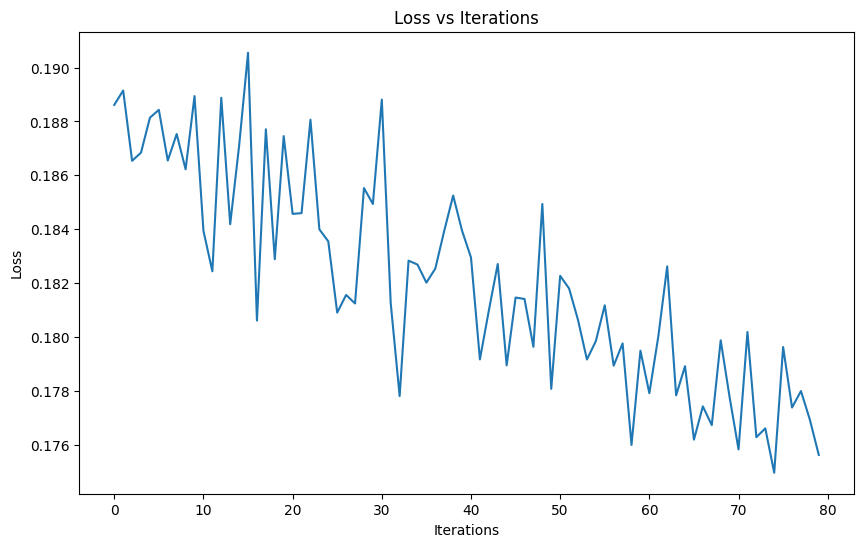

In [ ]:
import matplotlib.pyplot as plt
figure, ax= plt.subplots(1, figsize= (10, 6))
ax.plot(train_losses_MSE)
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Loss vs Iterations')
plt.show()

In [ ]:
# to plot the test images
import matplotlib.pyplot as plt
def plot_image_and_mask_tensors(image, true_mask, predicted_mask):
    image = image.permute(0, 2, 3, 1).cpu().squeeze(0).detach().numpy()*0.5+0.5
    true_mask= true_mask.permute(0, 2, 3, 1).cpu().squeeze(0).detach().numpy()
    predicted_mask= predicted_mask.permute(0, 2, 3, 1).cpu().squeeze(0).detach().numpy()
    predicted_mask = predicted_mask.astype(np.float32)

    predicted_mask[predicted_mask<0.5] = 0
    predicted_mask[predicted_mask >= 0.5] = 1

    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(image)
    ax[1].imshow(true_mask)
    ax[2].imshow(predicted_mask)
    plt.show()




In [ ]:
def plot_results(model, dataloader, number_of_results):
    for i, (im_tensor, mask_tensor, bbox_tensor) in enumerate(dataloader):
        with torch.no_grad():
            predicted_mask = model(im_tensor)
            plot_image_and_mask_tensors(im_tensor, mask_tensor, predicted_mask)
        if (i==number_of_results-1):
          break

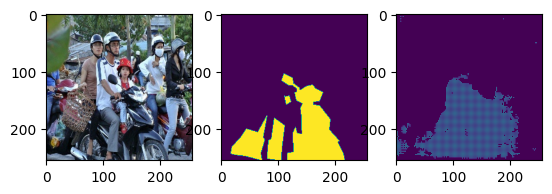

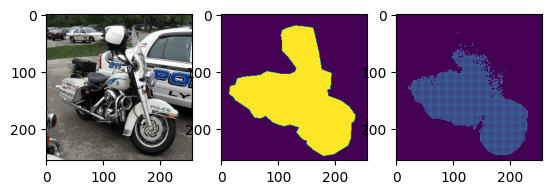

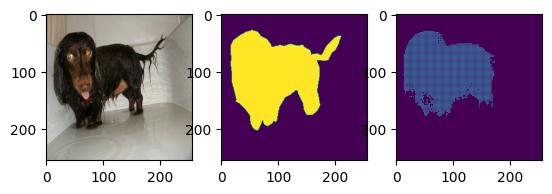

In [ ]:
plot_results(model_MSE, test_dataloader, 3)

In [ ]:
model_Dice = mUnet(skip_connections=True, depth=16)
# model_Dice.load_state_dict(torch.load('model_Dice.pth', map_location=device))


In [ ]:
train_losses_Dice=segmenter.run_code_for_training_for_semantic_segmentation(model_Dice,'model_Dice.pth', loss='Dice')



[epoch=1/10, iter=  50  elapsed_time= 21 secs]  Loss: 0.460
[epoch=1/10, iter= 100  elapsed_time= 41 secs]  Loss: 0.422
[epoch=1/10, iter= 150  elapsed_time= 61 secs]  Loss: 0.430
[epoch=1/10, iter= 200  elapsed_time= 81 secs]  Loss: 0.425
[epoch=1/10, iter= 250  elapsed_time=101 secs]  Loss: 0.421
[epoch=1/10, iter= 300  elapsed_time=121 secs]  Loss: 0.415
[epoch=1/10, iter= 350  elapsed_time=142 secs]  Loss: 0.414
[epoch=1/10, iter= 400  elapsed_time=162 secs]  Loss: 0.423

[epoch=2/10, iter=  50  elapsed_time=192 secs]  Loss: 0.416
[epoch=2/10, iter= 100  elapsed_time=212 secs]  Loss: 0.411
[epoch=2/10, iter= 150  elapsed_time=233 secs]  Loss: 0.404
[epoch=2/10, iter= 200  elapsed_time=253 secs]  Loss: 0.414
[epoch=2/10, iter= 250  elapsed_time=274 secs]  Loss: 0.413
[epoch=2/10, iter= 300  elapsed_time=296 secs]  Loss: 0.416
[epoch=2/10, iter= 350  elapsed_time=317 secs]  Loss: 0.413
[epoch=2/10, iter= 400  elapsed_time=338 secs]  Loss: 0.407

[epoch=3/10, iter=  50  elapsed_time=

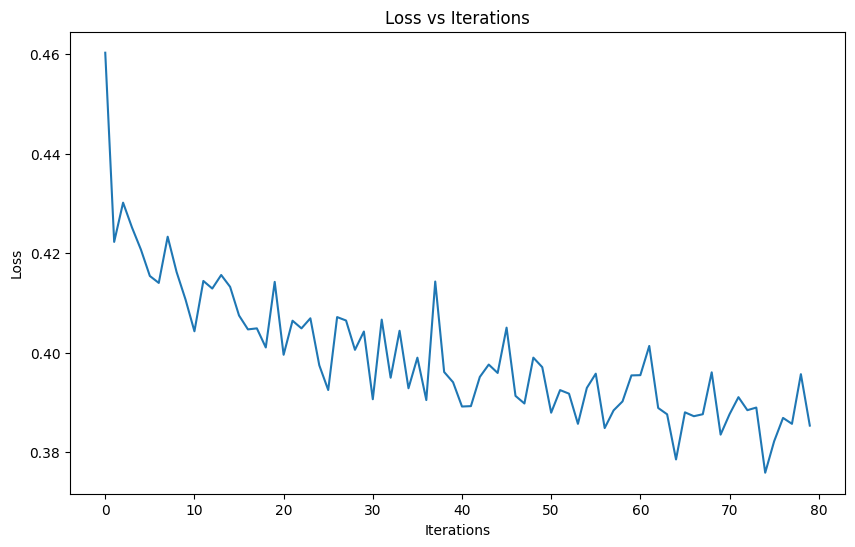

In [ ]:
figure, ax= plt.subplots(1, figsize= (10, 6))
ax.plot(train_losses_Dice)
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Loss vs Iterations')
plt.show()

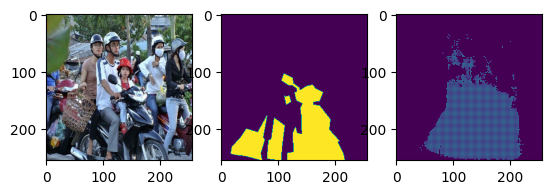

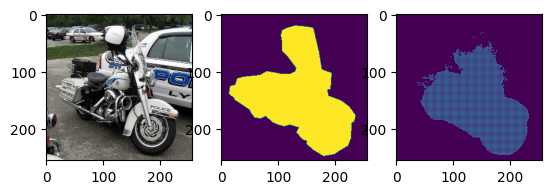

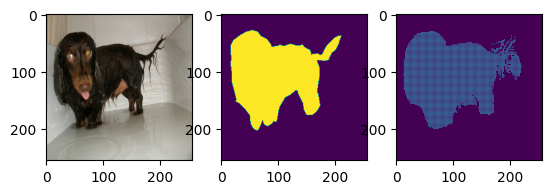

In [ ]:
plot_results(model_Dice, test_dataloader, 3)

In [ ]:
model_Combined = mUnet(skip_connections=True, depth=16)
model_Combined.load_state_dict(torch.load('model_Combined.pth', map_location=device))

<All keys matched successfully>

In [ ]:
train_losses_Combined=segmenter.run_code_for_training_for_semantic_segmentation(model_Combined,'model_Combined.pth', loss='Combined')

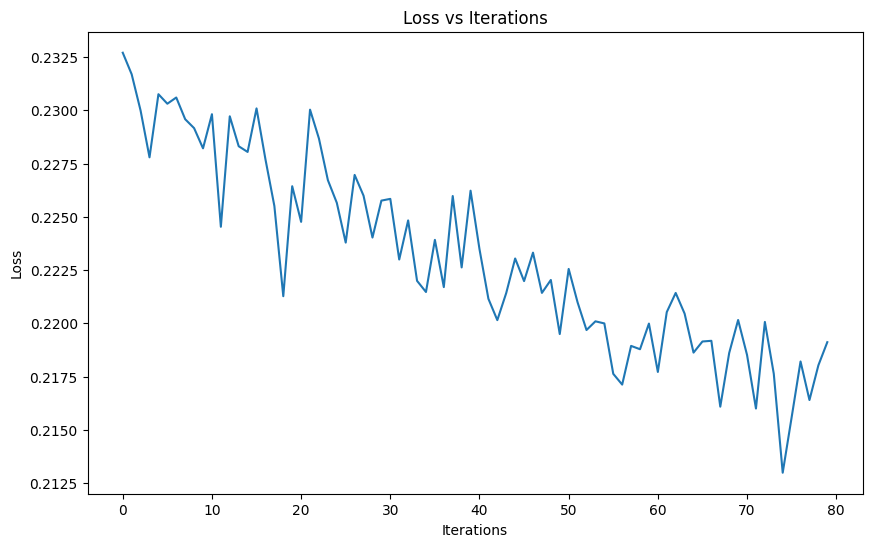

In [ ]:
figure, ax= plt.subplots(1, figsize= (10, 6))
ax.plot(train_losses_Combined)
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_title('Loss vs Iterations')
plt.show()


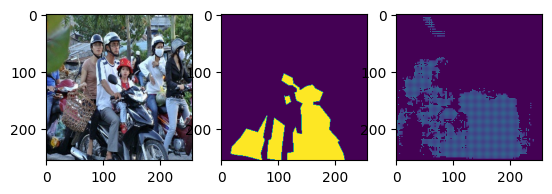

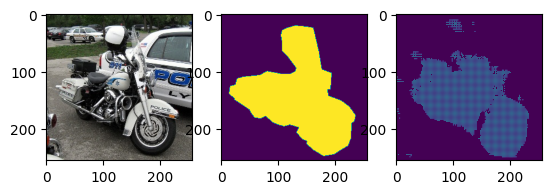

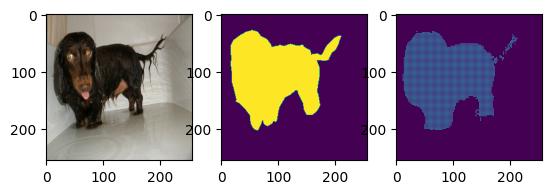

In [ ]:
plot_results(model_Combined, test_dataloader, 3)